In [1]:
# # most of our imports
# import warnings
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import tensorflow as tf
import tensorflow_hub as thub
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# from art.classifiers import KerasClassifier

from lib.data_utils import *

Using TensorFlow backend.


In [10]:
# Load the raw CIFAR-10 data
cifar10_dir = 'lib/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_cifar10(cifar10_dir)

testd = X_train[:1000]
testl = y_train[:1000]

In [11]:
testl = to_categorical(testl, 10)
testl.shape

(1000, 10)

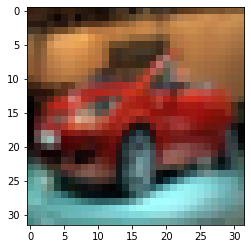

In [12]:
cifar_image = testd[45]
plt.imshow(cifar_image)


In [2]:
model_url = "https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1"

gan_eval_layer = thub.KerasLayer(model_url)

OSError: SavedModel file does not exist at: /var/folders/fj/_ghtrmrs4sq75w4yjfz9ncv00000gn/T/tfhub_modules/979b58b4aef29e685778ce8c50561ec3862fa997/{saved_model.pbtxt|saved_model.pb}

In [14]:
gan_eval_model = Sequential([gan_eval_layer])
gan_eval_model.build(input_shape=(None,32,32,3))

In [15]:
gan_eval_model.compile(
  optimizer=SGD(lr=0.1, momentum=0.9, decay=1e-4),
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])
gan_eval_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   multiple                  7796426   
Total params: 7,796,426
Trainable params: 0
Non-trainable params: 7,796,426
_________________________________________________________________


In [16]:
gan_eval_model.evaluate(testd,testl)

1000/1000 [==============================] - 8s 8ms/sample - loss: 1.1921e-07 - accuracy: 1.0000


[1.1920928955078125e-07, 1.0]